In [53]:
!pipenv install pandas seaborn matplotlib

Installing pandas...
Resolving pandas...
[    ] Installing...
Installation Succeeded
[    ] Installing pandas...
[    ] Installing pandas...

Installing seaborn...
Resolving seaborn...
[    ] Installing...
Installation Succeeded
[    ] Installing seaborn...
[    ] Installing seaborn...

Installing matplotlib...
Resolving matplotlib...
[    ] Installing...
Installation Succeeded
[    ] Installing matplotlib...
[    ] Installing matplotlib...

Installing dependencies from Pipfile.lock (b1cb81)...


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('../datasets\\sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [56]:
!pip -V

pip 24.0 from D:\Vignesh\Programming\Projects\Dev Track\Senti-meter\.venv\Lib\site-packages\pip (python 3.12)



In [57]:
!pipenv install textblob

Installing textblob...
Resolving textblob...
[    ] Installing...
Installation Succeeded
[    ] Installing textblob...
[    ] Installing textblob...

Installing dependencies from Pipfile.lock (b1cb81)...


In [58]:
texts = df['text']

In [59]:
texts.head()

0                What a great day!!! Looks like dream.
1       I feel sorry, I miss you here in the sea beach
2                                       Don't angry me
3    We attend in the class just for listening teac...
4                    Those who want to go, let them go
Name: text, dtype: object

In [60]:
print(texts.head(1))

0    What a great day!!! Looks like dream.
Name: text, dtype: object


In [61]:
!pipenv install scikit-learn

Installing scikit-learn...
Resolving scikit-learn...
[    ] Installing...
Installation Succeeded
[    ] Installing scikit-learn...
[    ] Installing scikit-learn...

Installing dependencies from Pipfile.lock (b1cb81)...


In [62]:
print(texts.loc[texts.index[0]])

What a great day!!! Looks like dream.


In [63]:
from textblob import TextBlob

In [64]:
blob = TextBlob( texts.loc[texts.index[0]] )

In [65]:
print( blob.sentiment )

Sentiment(polarity=1.0, subjectivity=0.75)


In [66]:
blob2 = TextBlob( texts.loc[texts.index[2]] )

In [67]:
print( blob.sentiment )

Sentiment(polarity=1.0, subjectivity=0.75)


In [68]:
texts.loc[texts.index[2]]

"Don't angry me"

In [69]:
!pipenv install nltk numpy matplotlib nltk

Installing nltk...
Resolving nltk...
[    ] Installing...
Installation Succeeded
[    ] Installing nltk...
[    ] Installing nltk...

Installing numpy...
Resolving numpy...
[    ] Installing...
Installation Succeeded
[    ] Installing numpy...
[    ] Installing numpy...

Installing matplotlib...
Resolving matplotlib...
[    ] Installing...
Installation Succeeded
[    ] Installing matplotlib...
[    ] Installing matplotlib...

Installing nltk...
Resolving nltk...
[    ] Installing...
Installation Succeeded
[    ] Installing nltk...
[    ] Installing nltk...

Installing dependencies from Pipfile.lock (b1cb81)...


In [70]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Home\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [73]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
df.shape

(499, 7)

In [75]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [76]:
df['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [77]:
df['sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': -1}, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_5484\2605835661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': -1}, inplace=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_5484\2605835661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [78]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,-1,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,-1,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",-1,Instagram


(array([134.,   0.,   0.,   0.,   0.,   0.,   0., 199.,   0.,   0.,   0.,
          0.,   0.,   0., 166.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
         1.        ]),
 <BarContainer object of 15 artists>)

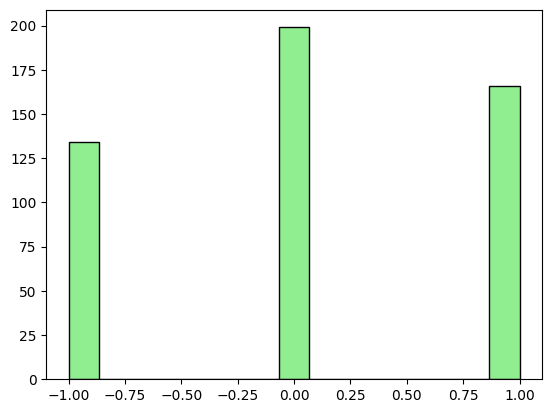

In [79]:
import matplotlib.pyplot as plt
plt.hist(df['sentiment'], color='lightgreen', ec='black', bins=15)

In [80]:
port_stem = PorterStemmer()

In [81]:
import re

In [82]:
def stemming( content ):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [83]:
df['stemmed_content'] = df['text'].apply(stemming)

In [84]:
df.head(10)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,stemmed_content
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter,great day look like dream
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook,feel sorri miss sea beach
2,2017,8,18,night,Don't angry me,-1,Facebook,angri
3,2022,6,8,morning,We attend in the class just for listening teac...,-1,Facebook,attend class listen teacher read slide nonsenc
4,2022,6,8,noon,"Those who want to go, let them go",-1,Instagram,want go let go
5,2016,11,22,night,"Its night 2 am, feeling neutral",0,Facebook,night feel neutral
6,2017,12,28,morning,2 am feedings for the baby are fun when he is ...,1,Facebook,feed babi fun smile coo
7,2017,12,28,noon,Soooo high,0,Instagram,soooo high
8,2019,10,28,night,Both of you,0,Twitter,
9,2018,5,28,morning,Today first time I arrive in the boat. Its ama...,1,Facebook,today first time arriv boat amaz journey


In [85]:
x = df['stemmed_content']
print(x)

0                           great day look like dream
1                           feel sorri miss sea beach
2                                               angri
3      attend class listen teacher read slide nonsenc
4                                      want go let go
                            ...                      
494            accord quarter famili six live poverti
495                          plan spend money go well
496                   upload bamboozl pictur facebook
497             congratul guy finish month earli booo
498                        actual wish back taho miss
Name: stemmed_content, Length: 499, dtype: object


In [86]:
y = df['sentiment']
print(y)

0      1
1      1
2     -1
3     -1
4     -1
      ..
494   -1
495   -1
496    0
497    1
498   -1
Name: sentiment, Length: 499, dtype: int64


In [98]:
vector = TfidfVectorizer()

In [99]:
x_feature = vector.fit_transform(x)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_feature,y, test_size=0.3,random_state=2)

In [101]:
print(x.shape,x_train.shape, x_test.shape)

(499,) (349, 1137) (150, 1137)


In [102]:
# x_train = vector.fit_transform(x_train)
# x_test = vector.fit_transform(x_test)
# x_test = vector.transform(x_test)

In [103]:
print(y.shape,y_train.shape, y_test.shape)

(499,) (349,) (150,)


In [104]:
print(x_train.get_shape())
print(x_test.get_shape())

(349, 1137)
(150, 1137)


In [105]:
model = LogisticRegression(max_iter=1000)

In [106]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [107]:
#prediction on test data.
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.5866666666666667
